In [1]:
import sys
sys.path.insert(1, '..')
import torch
from Visualization.bullseye_plot import *
from train import load_data
from DataLoader.cohorts import all_cohorts
from Helpers.metrics import get_rgb

c:\Users\JAVIER\anaconda3\envs\scarnet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.append('..')
import numpy as np
from matplotlib import pyplot as plt
from train import *
import numpy as np
from Visualization.rotation_plot import *
from argparse import Namespace

from Helpers.utils import *
from Helpers.data_utils import *
from train_javier import *
from Visualization.rotation_plot import *

from Trainers.unet_predictor import Predictor

# MULTI-BI-LSTM UNET
# "2023_05_19_1_epochs500_lr0.0001_unet_multi_bilstm_SD"        # New labels SD, NOT augment
# "2023_05_09_2_epochs500_lr0.0001_SD"                          # Old labels SD, NOT augment
# "2023_05_26_0_epochs500_lr0.0001_unet_multi_bilstm_SD"        # Old labels SD, YES augment
# "2023_05_18_4_epochs500_lr0.0001_unet_multi_bilstm_FWHM"      # New labels FWHM, NOT augment
# "2023_05_25_9_epochs500_lr0.0001_unet_multi_bilstm_FWHM"      # New labels FWHM, YES augment

# BI-LSTM UNET
# "2023_05_19_0_epochs500_lr0.0001_unet_bilstm_SD"              # New labels SD, NOT augment
# "2023_05_10_2_epochs500_lr0.0001_SD"                          # Old labels SD, NOT augment
# "2023_05_25_1_epochs500_lr0.0001_unet_bilstm_SD"              # Old labels SD, YES augment
# "2023_05_18_3_epochs500_lr0.0001_unet_bilstm_FWHM"            # New labels FWHM, NOT augment
# "2023_05_24_0_epochs500_lr0.0001_unet_bilstm_FWHM"            # New labels FWHM, YES augment

# 2D UNET
# "2023_05_19_0_epochs500_lr0.0001_unet_SD"                     # New labels SD, YES augment
# "2023_05_09_0_epochs500_lr0.0001_SD"                          # Old labels SD, YES augment
# "2023_05_18_0_epochs500_lr0.0001_unet_FWHM"                   # New labels FWHM, YES augment
# "2023_05_24_0_epochs500_lr0.0001_unet_FWHM"                   # New labels FWHM, NO augment


root = r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch"
# path_3D = os.path.join(root, 'Results', '3D', '2023_05_09_2_epochs500_lr0.0001_SD') # multi
path_2D = os.path.join(root, 'Results', '3D', '2023_05_24_0_epochs500_lr0.0001_unet_bilstm_FWHM') # unet
logger = logger_setup(folder=r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\del")
with open(os.path.join(path_2D, "config.txt")) as f:
    config = f.read()

config = config.split(r", ")
config[1] = r"device=0"
del config[2]
config = eval(r", ".join(config))
seed_everything(config.seed)

partition = config.fixed_sets

os.chdir(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch")
predictor3d = Predictor(fixed_sets=partition, cohorts=all_cohorts, logger=logger,config=config)
predictor3d.load_model_weights(os.path.join(path_2D, "network"))
img_list_3d, preds_list_3d, gt_list_3d, ids_list_3d, dice_scores_3d = predictor3d.predict_all(dataset="test")       
logger = logger_setup(folder=r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\del")

# root = r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch"
# path_2D = os.path.join(root, r'Results\2D\2023_05_09_0_epochs500_lr0.0001_SD')
# with open(os.path.join(path_2D, "config.txt")) as f:
#     config = f.read()

# config = config.split(r", ")
# config[1] = r"device=0"
# del config[2]
# config = eval(r", ".join(config))
# seed_everything(config.seed)

# partition = config.fixed_sets

# predictor2d = Predictor(fixed_sets=partition, cohorts=all_cohorts,logger=logger,config=config)
# predictor2d.load_model_weights(os.path.join(path_2D, "network"))
# img_list_2d, preds_list_2d, gt_list_2d, ids_list_2d, dice_scores_2d = predictor2d.predict_all(dataset="test")

Helpers.utils: INFO     Logging to: C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\del\2023_06_01_1_log.out
Helpers.utils: INFO     3D Model type chosen with architecture unet_bilstm and resnet34 encoder.
Helpers.utils: INFO     Architecture Summary:
ModelLoader(
  (encoder): ResNetEncoder(
    (resnet): ResNet(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_si

Dice FWHM


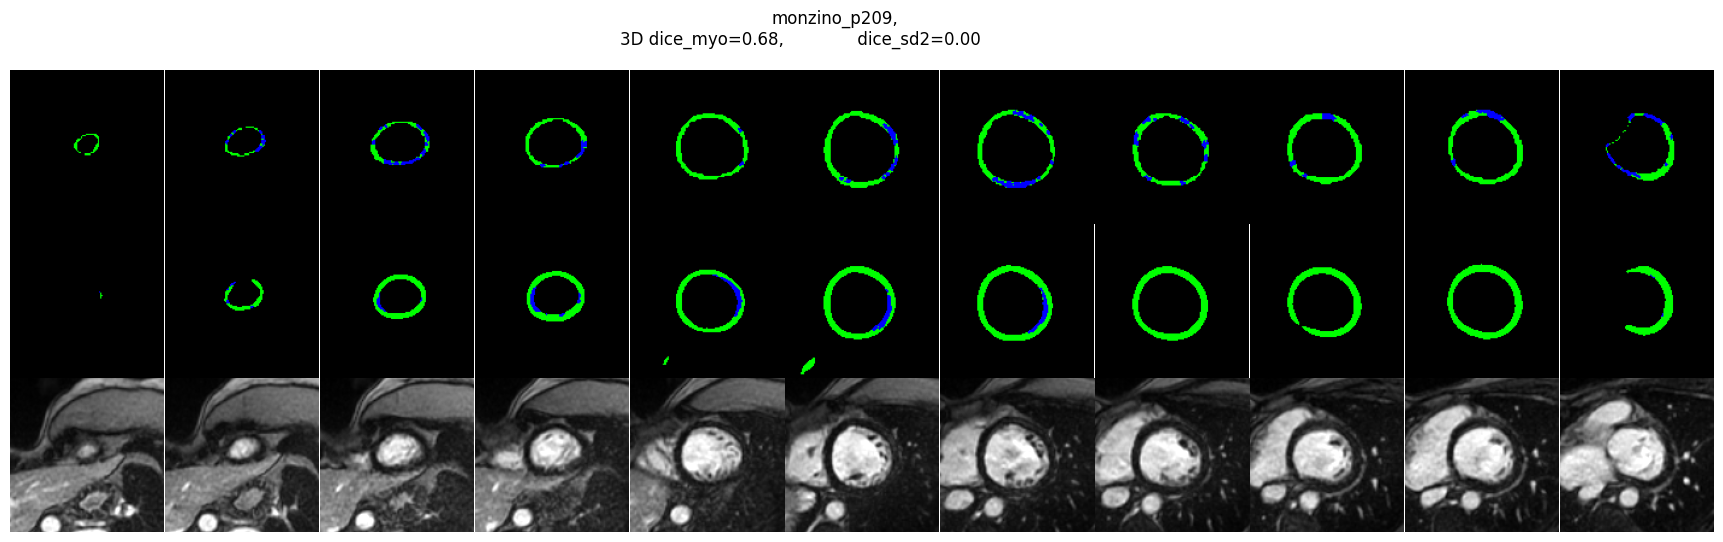

TypeError: 'AxesSubplot' object is not subscriptable

In [7]:
idx = ids_list_3d.index("monzino_p209")
print("Dice FWHM")


fig, axs = plt.subplots(nrows=3,ncols=len(gt_list_3d[idx]), figsize=(len(gt_list_3d[idx])*2,6), sharex=True, sharey=True)
list(map(lambda axi: axi.set_axis_off(), axs.ravel()))
for i in range(len(gt_list_3d[idx])):
    axs[0,i].imshow(get_rgb(gt_list_3d[idx][i].squeeze().detach().cpu()))

for i in range(len(preds_list_3d[idx])):
    axs[1,i].imshow(get_rgb(preds_list_3d[idx][i].squeeze().detach().cpu()))

for i in range(len(img_list_3d[idx])):
    axs[2,i].imshow(img_list_3d[idx][i].squeeze().detach().cpu(), cmap="gray")

plt.suptitle(f"{ids_list_3d[idx]},\n3D dice_myo={dice_scores_3d[0][idx]:.2f}, \
             dice_sd2={dice_scores_3d[1][idx]:.2f}\
             ")

# plt.suptitle(f"{ids_list_3d[idx]},\ndice_myo={dice_scores_3d[0][idx]:.2f}, \
#              dice_sd2={dice_scores_3d[1][idx]:.2f}, \
#              dice_sd5={dice_scores_3d[2][idx]:.2f}\n\
#              ")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
# plt.tight_layout()

# sd2_sectors, sd5_sectors, sd2_sectors_dice, sd5_sectors_dice = fill_sectors(preds_list_3d[idx].squeeze().numpy(), gt_list_3d[idx].squeeze().numpy())
# bullseye_plot(sd2_sectors, cmap=plt.cm.gist_heat, norm=colors.Normalize(vmin=0, vmax=1), dice_scores=sd2_sectors_dice)
# plt.show()
fig, axs = fig.subplots(nrows=2,ncols=1)
sd2_ratio, sd5_ratio = fill_sectors(preds_list_3d[idx].squeeze().numpy())
bullseye_plot(sd2_ratio,cmap=plt.cm.gist_heat, norm=colors.Normalize(vmin=0, vmax=1), axs=axs[0])
axs[0].set_title("Prediction")

sd2_ratio, sd5_ratio = fill_sectors(preds_list_3d[idx].squeeze().numpy())
bullseye_plot(sd2_ratio, cmap=plt.cm.gist_heat, norm=colors.Normalize(vmin=0, vmax=1), axs=axs[1])
axs[1].set_title("GT")

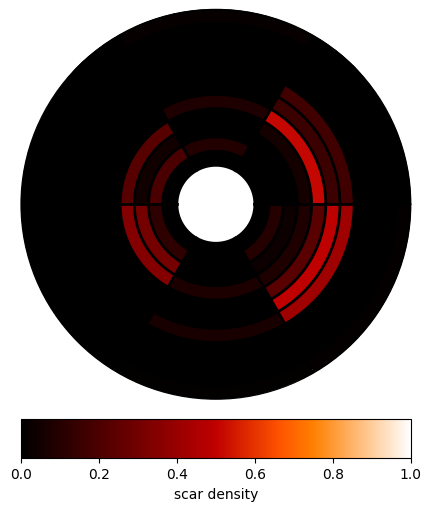

In [9]:
sd2_ratio, sd5_ratio = fill_sectors(preds_list_3d[idx].squeeze().numpy())
bullseye_plot(sd2_ratio,cmap=plt.cm.gist_heat, norm=colors.Normalize(vmin=0, vmax=1), axs=None)

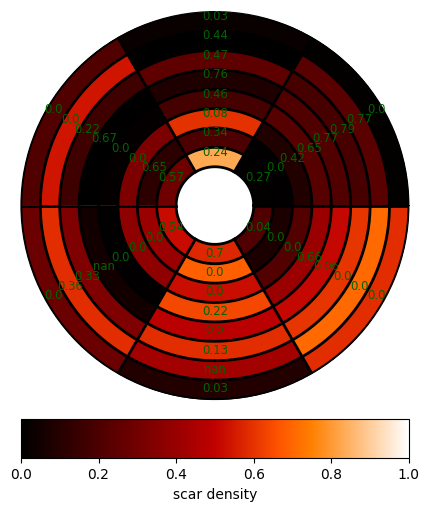

In [95]:
new = np.load(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\NewData\NewData\monzino\p137\labels.npy")
im = np.load(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\NewData\NewData\monzino\p137\images.npy")

In [96]:
im.shape

(16, 144, 144)

In [97]:
new = np.sum(new[..., [6,9]], axis=3)


In [98]:
len(new)

16

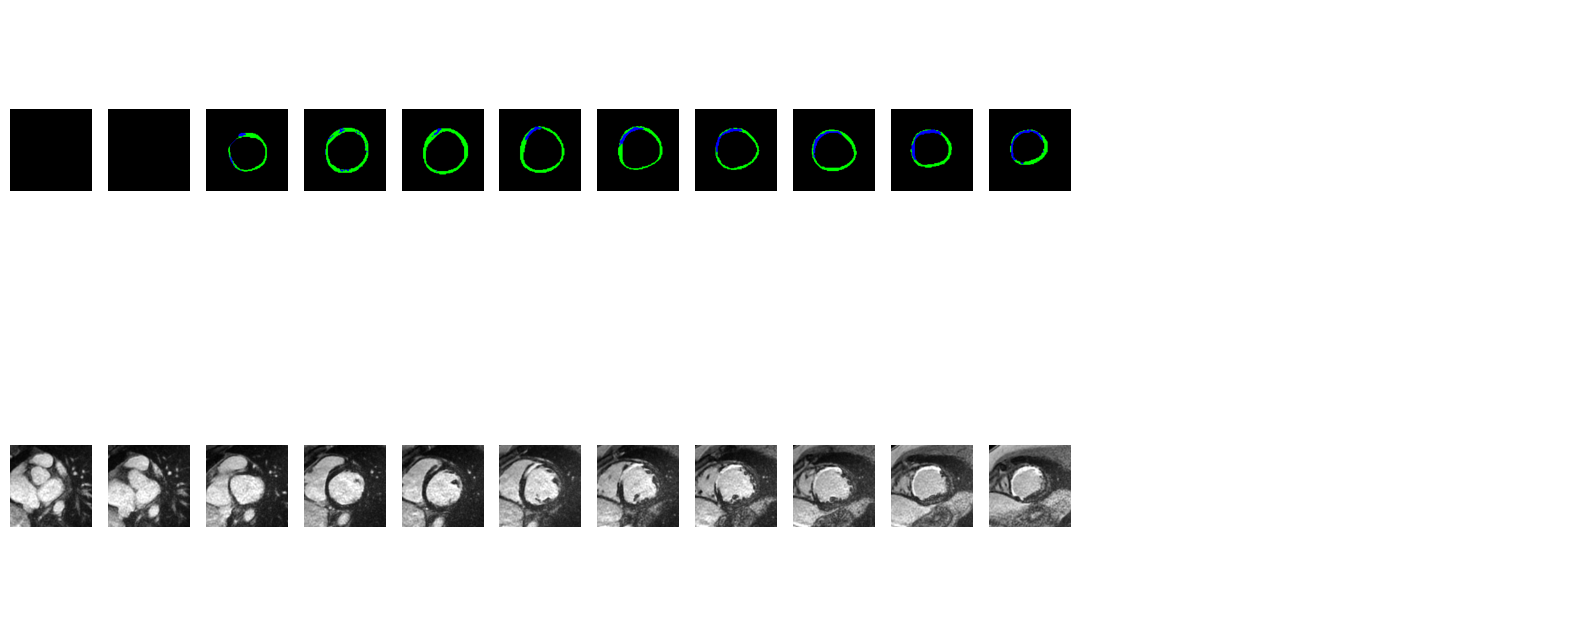

In [99]:
fig, axs = plt.subplots(nrows=2,ncols=len(new), figsize=(20,8), sharex=True, sharey=True)
list(map(lambda axi: axi.set_axis_off(), axs.ravel()))
for i in range(len(gt_list_3d[idx])):
    axs[0,i].imshow(get_rgb(torch.from_numpy(new[i])))
for i in range(len(gt_list_3d[idx])):
    axs[1,i].imshow(im[i], cmap="gray")
